In [19]:
import numpy as np
import pandas as pd

In [8]:
import tensorflow as tf

In [2]:
train_1 = pd.read_csv('/Users/trijalsrivastava/Code/ML/CS771/mini-project-1/datasets/train/train_emoticon.csv')
# train_2 = pd.read_csv('/Users/trijalsrivastava/Code/ML/CS771/mini-project-1/datasets/train/train_emoticon.csv')

In [3]:
train_1.head()

,input_emoticon,label
0,😛🛐😻😑😣🙠🙯🚼😒🙼😑🙯😣,0
1,🛐😑😪😛🚼🙯😣🚅😑🙯😹😣🙼,0
2,😛🙯😑🚡😣🚼🛐🙲😣🙯🛑😑🙼,0
3,😛🚼🛐🙐😣🙯😑🙪😑🙼🛆😣🙯,1
4,🛐🚟🚼😛🙋😑😣🙯😹🙯😑😣🙼,1


In [4]:
data = np.load("/Users/trijalsrivastava/Code/ML/CS771/mini-project-1/datasets/train/train_feature.npz")


In [5]:
data.files

['features', 'label']

In [9]:
path = tf.keras.utils.get_file('train_feature.npz', 'file:///Users/trijalsrivastava/Code/ML/CS771/mini-project-1/datasets/train/train_feature.npz')
with np.load(path) as data:
  train_examples = data['features']
  train_labels = data['label']

282804032/282804032 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
path = tf.keras.utils.get_file('valid_feature.npz', 'file:///Users/trijalsrivastava/Code/ML/CS771/mini-project-1/datasets/valid/valid_feature.npz')
with np.load(path) as data:
  valid_examples = data['features']
  valid_labels = data['label']

19533128/19533128 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
print(train_examples.shape, train_labels.shape)
print(valid_examples.shape, valid_labels.shape)

train_examples = np.asarray(train_examples, dtype=np.float32)
train_labels = np.asarray(train_labels, dtype=np.int32)
valid_examples = np.asarray(valid_examples, dtype=np.float32)
valid_labels = np.asarray(valid_labels, dtype=np.int32)

# train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
# test_dataset = tf.data.Dataset.from_tensor_slices((valid_examples, valid_labels))
print(type(train_examples), type(train_labels))
print(type(train_examples[0]), type(train_labels[0]))



(7080, 13, 768) (7080,)
(489, 13, 768) (489,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.int32'>


## Using basic RF classifier and 100% dataset 

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Flatten the input (since models like RandomForest expect 2D input)
train_examples_flat = train_examples.reshape(train_examples.shape[0], -1)
valid_examples_flat = valid_examples.reshape(valid_examples.shape[0], -1)


clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(train_examples_flat, train_labels)
y_pred = clf.predict(valid_examples_flat)
print("Accuracy:", accuracy_score(valid_labels, y_pred))


Accuracy: 0.9243353783231084


## Using partial dataset now 80% then 70% then 60% then 50%

In [25]:
from sklearn.model_selection import train_test_split

train_examples_80, train_examples_20, train_labels_80, train_labels_20 = train_test_split( train_examples_flat, train_labels, test_size=0.2, random_state=42)
train_examples_70, train_examples_30, train_labels_70, train_labels_30 = train_test_split( train_examples_flat, train_labels, test_size=0.3, random_state=42)
train_examples_60, train_examples_40, train_labels_60, train_labels_40 = train_test_split( train_examples_flat, train_labels, test_size=0.4, random_state=42)
train_examples_50, train_examples_50, train_labels_50, train_labels_50 = train_test_split( train_examples_flat, train_labels, test_size=0.5, random_state=42)

In [30]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(train_examples_flat, train_labels)
y_pred = clf.predict(valid_examples_flat)
print("Accuracy with 100%:", accuracy_score(valid_labels, y_pred))

Accuracy with 100%: 0.9243353783231084


In [31]:

clf_1 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf_1.fit(train_examples_80, train_labels_80)
y_pred = clf_1.predict(valid_examples_flat)
print("Accuracy with 80%:", accuracy_score(valid_labels, y_pred))


Accuracy with 80%: 0.9386503067484663


In [32]:
clf_2 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf_2.fit(train_examples_70, train_labels_70)
y_pred = clf_2.predict(valid_examples_flat)
print("Accuracy with 70%:", accuracy_score(valid_labels, y_pred))


Accuracy with 70%: 0.9304703476482618


In [33]:
clf_3 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf_3.fit(train_examples_60, train_labels_60)
y_pred = clf_3.predict(valid_examples_flat)
print("Accuracy with 60%:", accuracy_score(valid_labels, y_pred))

Accuracy with 60%: 0.9304703476482618


In [34]:
clf_4 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf_4.fit(train_examples_50, train_labels_50)
y_pred = clf_4.predict(valid_examples_flat)
print("Accuracy with 50%:", accuracy_score(valid_labels, y_pred))

Accuracy with 50%: 0.9243353783231084


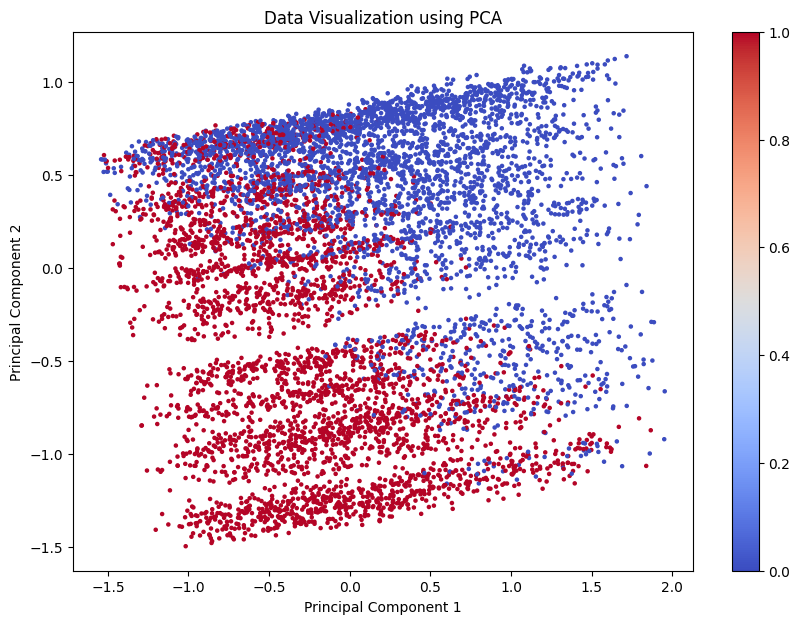

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(train_examples_flat)

# tsne = TSNE(n_components=2)
# tsne_result = tsne.fit_transform(train_examples_flat)

# Step 3: Visualization
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=train_labels, cmap='coolwarm', s=5)
plt.colorbar()  # Show color bar for class labels
plt.title('Data Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


SVM Accuracy on Test Data: 83.66%


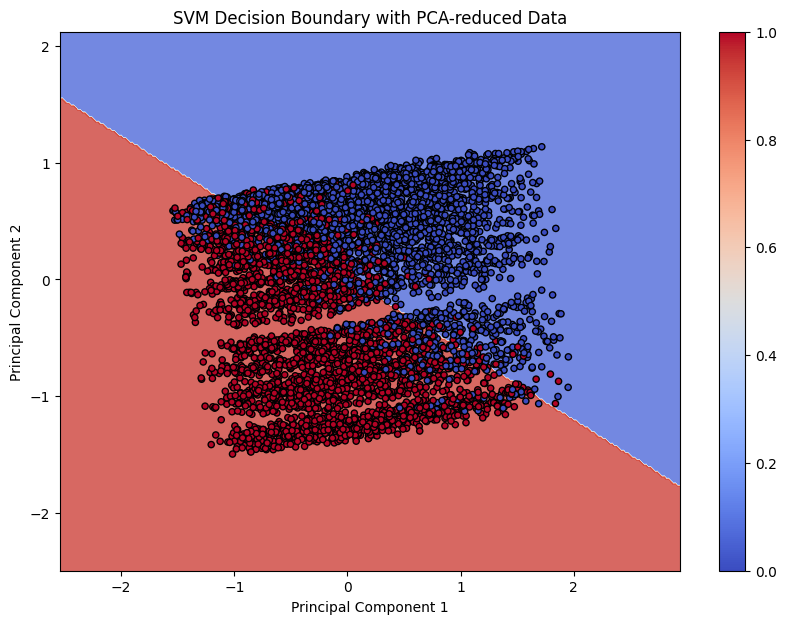

In [40]:
from sklearn.svm import SVC
# Step 2: Dimensionality reduction using PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(train_examples_flat)
 
 
X_train, X_test, y_train, y_test = train_test_split(pca_result, train_labels, test_size=0.3, random_state=42)
svm_classifier = SVC(kernel='linear')  # Using a linear kernel for simplicity
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy on Test Data: {accuracy * 100:.2f}%")

# Step 6: Visualize the SVM decision boundary
# Create a mesh to plot the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = pca_result[:, 0].min() - 1, pca_result[:, 0].max() + 1
y_min, y_max = pca_result[:, 1].min() - 1, pca_result[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundary by predicting for each point in the mesh
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 7: Plot the PCA components and the decision boundary
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)  # Plot decision boundary
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=train_labels, cmap='coolwarm', edgecolors='k', s=20)  # Plot data points
plt.title('SVM Decision Boundary with PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()
